In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
wine = pd.read_csv('save_total.csv')
df = wine.copy()

In [5]:
df['quality'] = df['quality'].apply(lambda x: '나쁨' if x <= 5 else '좋음')

In [42]:
X=df.drop('quality',axis=1)
X1 = df[['volatile acidity','citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide','alcohol', 'sulphates', 'chlorides', 'pH']]
y=df['quality']

from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=23)

In [43]:
knn.fit(X1_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [44]:
knn.score(X1_test,y_test), knn.score(X1_train,y_train)

(0.7389705882352942, 0.7635694572217111)

In [9]:
acc_test=[]
acc_train=[]
for i in range(1,100):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))

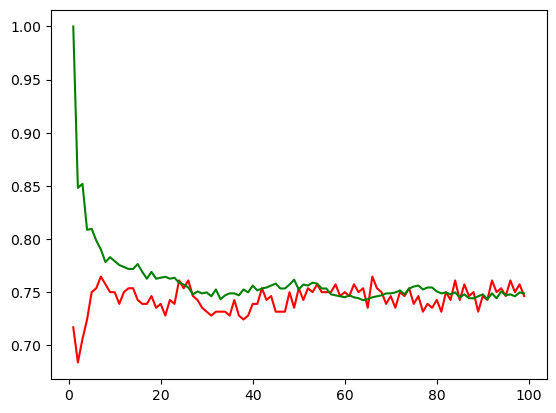

In [10]:
plt.plot(range(1,100), acc_test,'r')
plt.plot(range(1,100), acc_train, 'g')

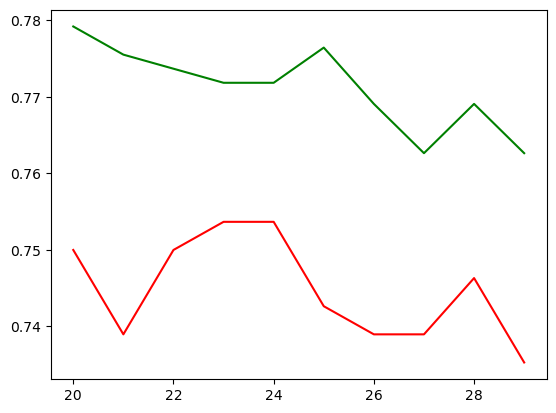

In [20]:
acc_test=[]
acc_train=[]
for i in range(10,20):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))
    
plt.plot(range(20,30), acc_test,'r')
plt.plot(range(20,30), acc_train, 'g')

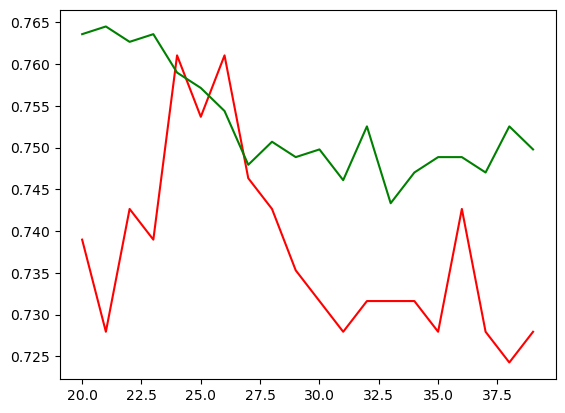

In [23]:
acc_test=[]
acc_train=[]
for i in range(20,40):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))
    
plt.plot(range(20,40), acc_test,'r')
plt.plot(range(20,40), acc_train, 'g')

In [11]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성
knn = KNeighborsClassifier()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X1_train, y_train)

# 최적의 파라미터와 최적의 정확도 얻기
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 정확도: {best_accuracy:.2f}')


최적의 파라미터: {'n_neighbors': 85}
최적의 정확도: 0.75


In [16]:
#최적의 모델로 테스트 세트에서 정확도 계산
test_accuracy = grid_search.best_estimator_.score(X1_test, y_test)
print("Test Accuracy of Best Model:", test_accuracy)

Test Accuracy of Best Model: 0.6102941176470589


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성
knn = KNeighborsClassifier()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')  # 또는 'f1_micro'로 설정 가능

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X1_train, y_train)

# 최적의 파라미터와 최적의 F1 점수 얻기
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 F1 점수: {best_f1:.4f}')


최적의 파라미터: {'n_neighbors': 20}
최적의 F1 점수: 0.5588


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성
knn = KNeighborsClassifier()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_micro')  # 또는 'f1_micro'로 설정 가능

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X1_train, y_train)

# 최적의 파라미터와 최적의 F1 점수 얻기
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 F1 점수: {best_f1:.4f}')

최적의 파라미터: {'n_neighbors': 72}
최적의 F1 점수: 0.5842


--------------------------------------------------------------

# 맨하튼 거리

In [19]:
# 맨하탄 거리를 사용하는 KNeighborsClassifier 생성
knn_manhattan = KNeighborsClassifier(n_neighbors=23, metric='manhattan')
knn_manhattan.fit(X1_train, y_train)

knn_manhattan.score(X1_test,y_test), knn_manhattan.score(X1_train,y_train)

(0.7426470588235294, 0.7608095676172953)

In [20]:
acc_test=[]
acc_train=[]
for i in range(1,100):
    knn_k = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))

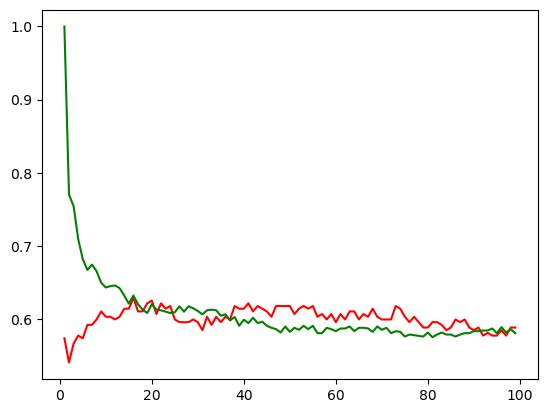

In [21]:
plt.plot(range(1,100), acc_test,'r')
plt.plot(range(1,100), acc_train, 'g')

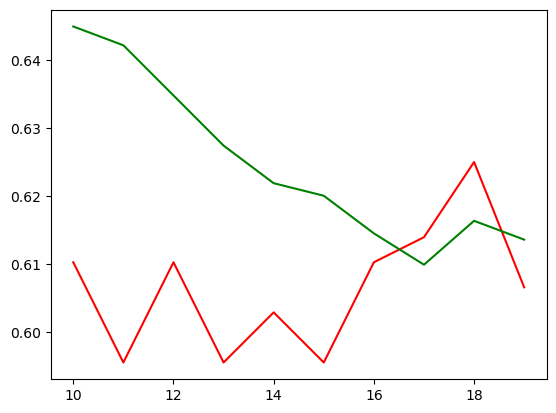

In [108]:
acc_test=[]
acc_train=[]
for i in range(10,20):
    knn_k = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))
    
plt.plot(range(10,20), acc_test,'r')
plt.plot(range(10,20), acc_train, 'g')

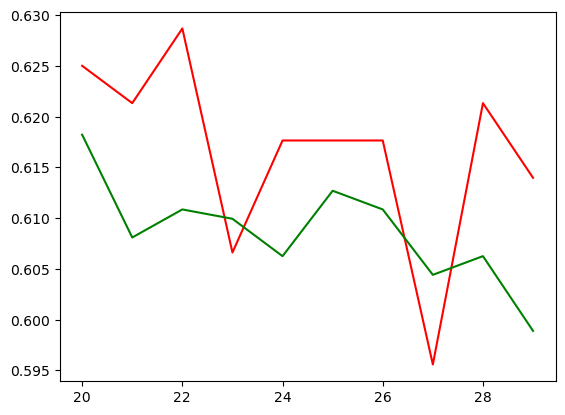

In [109]:
acc_test=[]
acc_train=[]
for i in range(20,30):
    knn_k = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))
    
plt.plot(range(20,30), acc_test,'r')
plt.plot(range(20,30), acc_train, 'g')

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성 (맨하튼 거리를 사용하려면 metric='manhattan' 설정)
knn = KNeighborsClassifier(metric='manhattan')

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X1_train, y_train)

# 최적의 파라미터와 최적의 정확도 얻기
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 정확도: {best_accuracy:.4f}')

최적의 파라미터: {'n_neighbors': 75}
최적의 정확도: 0.5952


In [78]:
# 최적의 모델로 테스트 세트에서 정확도 계산
test_accuracy = grid_search.best_estimator_.score(X1_test, y_test)
print("Test Accuracy of Best Model:", test_accuracy)

Test Accuracy of Best Model: 0.6286764705882353


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성 (맨하튼 거리를 사용하려면 metric='manhattan' 설정)
knn = KNeighborsClassifier(metric='manhattan')

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')  # 또는 'f1_micro'로 설정 가능

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X1_train, y_train)

# 최적의 파라미터와 최적의 F1 점수 얻기
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 F1 점수: {best_f1:.4f}')


최적의 파라미터: {'n_neighbors': 53}
최적의 F1 점수: 0.5554


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성 (맨하튼 거리를 사용하려면 metric='manhattan' 설정)
knn = KNeighborsClassifier(metric='manhattan')

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_micro')  # 또는 'f1_micro'로 설정 가능

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X1_train, y_train)

# 최적의 파라미터와 최적의 F1 점수 얻기
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 F1 점수: {best_f1:.4f}')

최적의 파라미터: {'n_neighbors': 75}
최적의 F1 점수: 0.5952


-------------------------------------------------------------

# 체비셰프 거리

In [112]:
# 체비셰프 거리를 사용하는 KNeighborsClassifier 생성
knn_chebyshev = KNeighborsClassifier(n_neighbors=17, metric='chebyshev')
knn_chebyshev.fit(X1_train, y_train)

# 테스트 세트 및 훈련 세트에 대한 정확도 출력
accuracy_test = knn_chebyshev.score(X1_test, y_test)
accuracy_train = knn_chebyshev.score(X1_train, y_train)

print(f'체비셰프 거리를 사용한 KNN의 테스트 정확도: {accuracy_test:.4f}')
print(f'체비셰프 거리를 사용한 KNN의 훈련 정확도: {accuracy_train:.4f}')


체비셰프 거리를 사용한 KNN의 테스트 정확도: 0.5809
체비셰프 거리를 사용한 KNN의 훈련 정확도: 0.6283


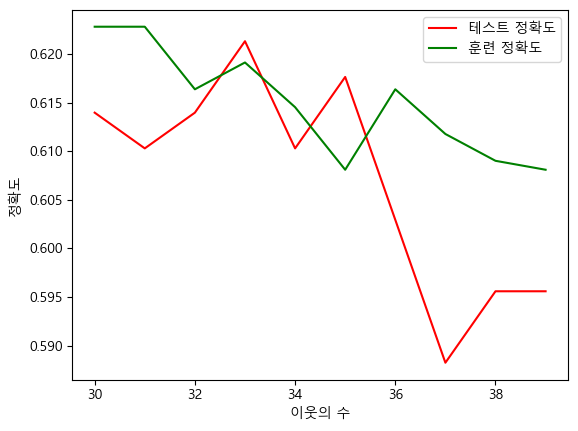

In [114]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 그래프 그리기
plt.plot(range(30, 40), acc_test, 'r', label='테스트 정확도')
plt.plot(range(30, 40), acc_train, 'g', label='훈련 정확도')
plt.xlabel('이웃의 수')
plt.ylabel('정확도')
plt.legend()
plt.show()
